In [ ]:
                                            ARIMA AND SARIMA

In [ ]:
#ARIMA stands for:

Auto-Regressive (AR, p) → Uses past values to predict future ones.
Differencing (I, d) → Removes trends to make data stationary.
Moving Average (MA, q) → Uses past errors to refine predictions.
    
Equation for ARIMA(1,1,1):𝑌𝑡=𝜙𝑌𝑡−1+𝜃𝑒𝑡−1+𝑒𝑡

where:
𝑌𝑡= Predicted value
𝑌𝑡−1= Previous value (AR)
𝑒𝑡−1= Previous error (MA)
𝑑=1(Differencing applied once)

Steps in ARIMA:
Check if data is stationary (If not, apply differencing).
Find the best (p, d, q) values (Using ACF, PACF, or auto_arima).
Train the model & make predictions.

How Does SARIMA Work?
SARIMA adds seasonality to ARIMA by including:

Seasonal Auto-Regressive (P)
Seasonal Differencing (D)
Seasonal Moving Average (Q)
Seasonal Period (S) → How often the pattern repeats (e.g., 12 for monthly data).
Equation for SARIMA(1,1,1)(1,1,1,12):𝑌𝑡=𝜙𝑌𝑡−1+𝜃𝑒𝑡−1+Φ𝑌𝑡−12+Θ𝑒𝑡−12+𝑒𝑡

where:
𝑌𝑡−12= Seasonal component (12-month cycle).
                           
Steps in SARIMA
Check for seasonality (Plot data or use seasonal_decompose).
Find the best (p, d, q) and (P, D, Q, S).
Train SARIMA & make predictions.

In [ ]:
#The "UDAIPUR RAINFALL" dataset likely contains historical rainfall data for Udaipur, India.
#It helps analyze rainfall patterns over time, detect seasonality, and make future predictions using time series models like ARIMA and SARIMA.

#The dataset contains 132 rows and 6 columns.
Columns include:
States (all entries are "Rajasthan"),
Districts (all entries are "Udaipur"),
Variable (Rainfall in mm),
Unit (Millimetres),
Date (Time component),
Value (Rainfall amount).

#This Dataset Helps With?
Understanding Rainfall Trends 

#Is rainfall increasing or decreasing over the years?
Detecting Seasonality 

#Does Udaipur get more rain in certain months? (Monsoon patterns)
Predicting Future Rainfall 

#Using ARIMA/SARIMA to forecast next year's rainfall.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
df = pd.read_csv(r"C:\Users\vaibh\OneDrive\Desktop\File\UDAIPUR RAINFALL.csv")

In [5]:
print(df.head())  # Shows the first 5 rows

      states districts        variable         Unit        Date  Value
0  Rajasthan   Udaipur  Rainfall (mm.)  Millimetres  01-01-2010    0.3
1  Rajasthan   Udaipur  Rainfall (mm.)  Millimetres  01-02-2010    0.0
2  Rajasthan   Udaipur  Rainfall (mm.)  Millimetres  01-03-2010    0.0
3  Rajasthan   Udaipur  Rainfall (mm.)  Millimetres  01-04-2010    0.0
4  Rajasthan   Udaipur  Rainfall (mm.)  Millimetres  01-05-2010    0.0


In [7]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [9]:
# Set 'Date' as index
df.set_index('Date', inplace=True)

In [11]:
print(df.head())

               states districts        variable         Unit  Value
Date                                                               
2010-01-01  Rajasthan   Udaipur  Rainfall (mm.)  Millimetres    0.3
2010-02-01  Rajasthan   Udaipur  Rainfall (mm.)  Millimetres    0.0
2010-03-01  Rajasthan   Udaipur  Rainfall (mm.)  Millimetres    0.0
2010-04-01  Rajasthan   Udaipur  Rainfall (mm.)  Millimetres    0.0
2010-05-01  Rajasthan   Udaipur  Rainfall (mm.)  Millimetres    0.0


In [13]:
# Keep only the 'Value' column (Rainfall in mm)
df = df[['Value']]

In [17]:
df

,Value
Date,
2010-01-01,0.3
2010-02-01,0.0
2010-03-01,0.0
2010-04-01,0.0
2010-05-01,0.0
...,...
2020-08-01,407.0
2020-09-01,121.9
2020-10-01,7.6


In [15]:
print(df.head())

            Value
Date             
2010-01-01    0.3
2010-02-01    0.0
2010-03-01    0.0
2010-04-01    0.0
2010-05-01    0.0


In [ ]:
#Visualize the Time Series Data

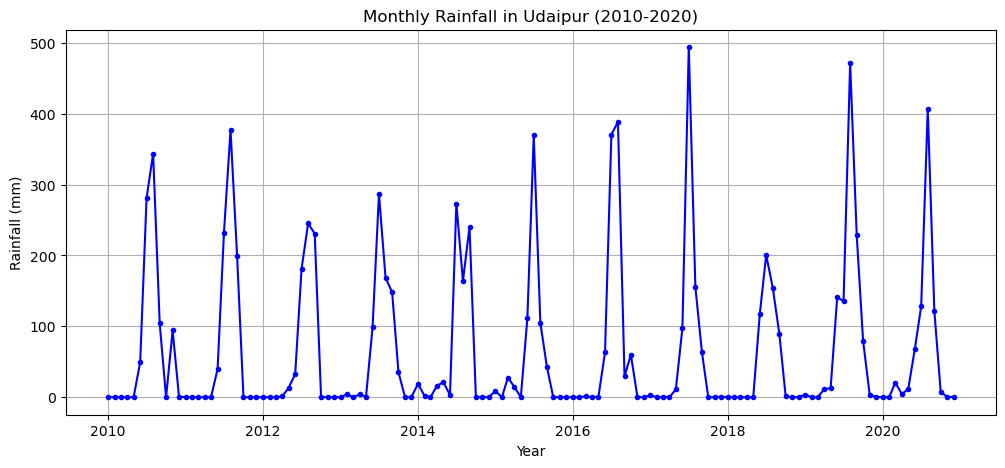

In [21]:
plt.figure(figsize=(12, 5))
plt.plot(df, color='blue', linestyle='-', marker='o', markersize=3)
plt.title('Monthly Rainfall in Udaipur (2010-2020)')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()


In [ ]:
#Rainfall values show seasonal peaks every year.
Some months have zero or very low rainfall, indicating strong seasonality.
The data seems to be non-stationary (changing trend over time).

In [ ]:
#Check for Stationarity ( Augmented Dickey-Fuller (ADF)  Test)

In [ ]:
#to confirm stationarity, I will apply the Augmented Dickey-Fuller (ADF)

In [135]:
from statsmodels.tsa.stattools import adfuller

In [21]:
# Perform ADF test
adf_test = adfuller(df['Value'])

In [23]:
adf_test

(-2.919206165313636,
 0.04315973392525898,
 11,
 120,
 {'1%': -3.486055829282407,
  '5%': -2.8859430324074076,
  '10%': -2.5797850694444446},
 1329.536238534654)

In [27]:
# Extract results
adf_statistic, p_value, _, _, critical_values, _ = adf_test

In [29]:

# Display ADF test results
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print("Critical Values:", critical_values)

ADF Statistic: -2.919206165313636
p-value: 0.04315973392525898
Critical Values: {'1%': -3.486055829282407, '5%': -2.8859430324074076, '10%': -2.5797850694444446}


In [31]:
# Interpretation
if p_value < 0.05:
    print("The data is stationary.")
else:
    print("The data is non-stationary, differencing required.")

The data is stationary.


In [ ]:
#Differencing (if needed)

In [33]:
# Apply first-order differencing
df_diff = df.diff().dropna()

In [35]:
df_diff

,Value
Date,
2010-02-01,-0.3
2010-03-01,0.0
2010-04-01,0.0
2010-05-01,0.0
2010-06-01,49.6
...,...
2020-08-01,278.6
2020-09-01,-285.1
2020-10-01,-114.3


In [37]:
# Re-check stationarity after differencing
adf_test = adfuller(df_diff['Value'])
print("Post-Differencing ADF Statistic:", adf_test[0])
print("Post-Differencing p-value:", adf_test[1])

Post-Differencing ADF Statistic: -16.697551513315442
Post-Differencing p-value: 1.4705993597466962e-29


In [ ]:
#Determine ARIMA Parameters (p, d, q) using ACF & PACF

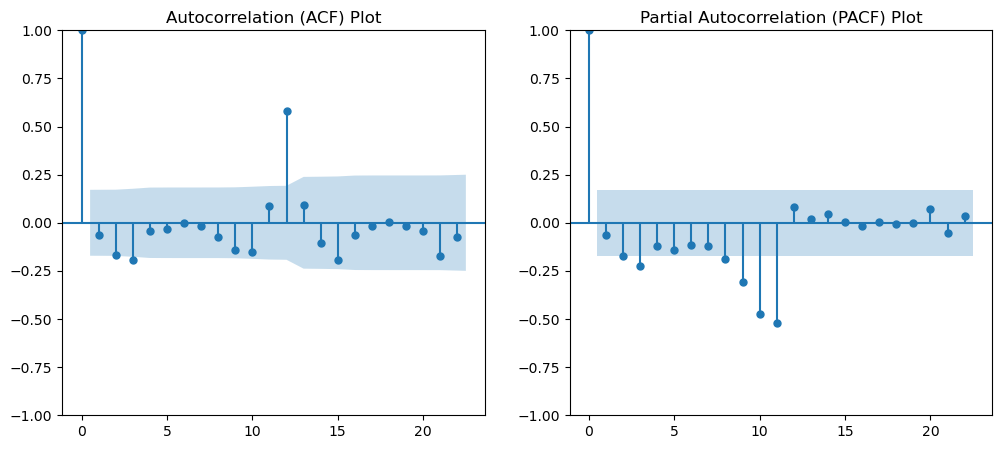

In [39]:
# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(df_diff, ax=ax[0])
ax[0].set_title("Autocorrelation (ACF) Plot")

plot_pacf(df_diff, ax=ax[1])
ax[1].set_title("Partial Autocorrelation (PACF) Plot")

plt.show()


In [47]:
!pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------- ----------------- 358.4/625.1 kB 5.6 MB/s eta 0:00:01
   ------------------------------- -------- 491.5/625.1 kB 5.2 MB/s eta 0:00:01
   ------------------------------------- -- 583.7/625.1 kB 4.6 MB/s eta 0:00:01
   ------------------------------------- -- 583.7/625.1 kB 4.6 MB/s eta 0:00:01
   ------------------------------------- -- 583.7/625.1 kB 4.6 MB/s eta 0:00:01
   ------------------------------------- -- 583.7/625.1 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 625.1/625.1 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   -- ------------------------------------- 0.2/2.8 MB 5.1 MB/s eta 0:00:01
   ----- ---------------------------------- 0.4/2.8 MB 5.0 MB/s eta 0:00:01
   --------- ------------------------------ 0.6/2.8 MB 5.1 MB/s eta 0:00:01
   ----------- ---------------------------- 0.8/2.8 MB 5.2 MB/s eta 0:00

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [51]:
from pmdarima import auto_arima
auto_model = auto_arima(df, seasonal=False, stepwise=True)
print(auto_model.order)  # Suggested (p, d, q)


(3, 0, 0)


In [53]:
# Forecast next 12 months
forecast_arima = arima_result.forecast(steps=12)

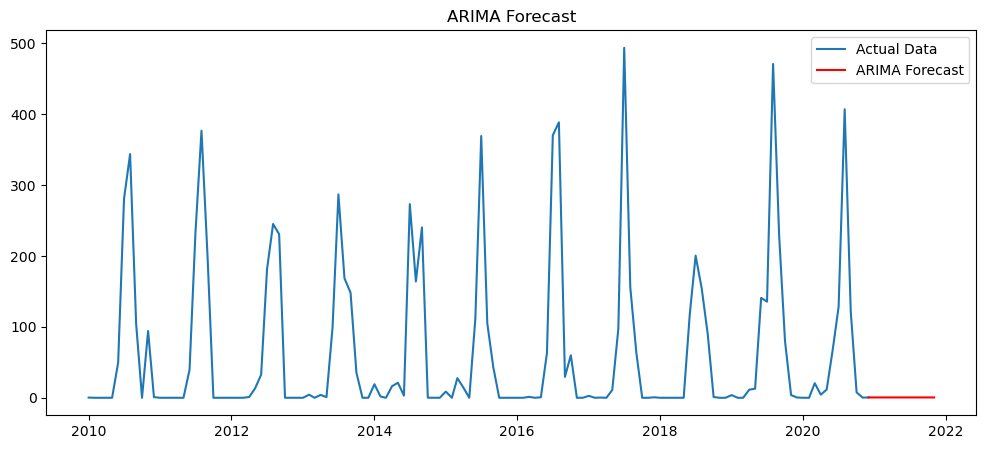

In [55]:
# Plot original data and forecast
plt.figure(figsize=(12, 5))
plt.plot(df, label="Actual Data")
plt.plot(pd.date_range(df.index[-1], periods=12, freq='MS'), forecast_arima, label="ARIMA Forecast", color='red')
plt.legend()
plt.title("ARIMA Forecast")
plt.show()

In [ ]:
#Determine SARIMA Parameters (P, D, Q, s)

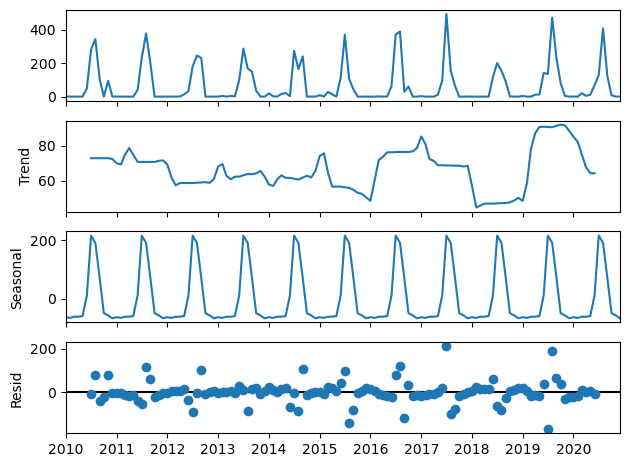

In [59]:
# Seasonal decomposition plot
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df, model='additive', period=12)
decomposition.plot()
plt.show()


In [ ]:
#Fit SARIMA Model & Forecast

In [65]:
print(df.index)  
print(df.index.dtype)  # Should be datetime64[ns]


DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='Date', length=132, freq=None)
datetime64[ns]


In [75]:
df = df.asfreq('MS')  # Monthly Start
 

In [77]:
print(df.head())

            Value
Date             
2010-01-01    0.3
2010-02-01    0.0
2010-03-01    0.0
2010-04-01    0.0
2010-05-01    0.0


In [111]:
# Split data into train and test
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [115]:
# Fit ARIMA model on training data
from pmdarima import auto_arima

auto_model = auto_arima(df, seasonal=False, stepwise=True, trace=True)
print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1602.278, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1663.147, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1600.052, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1612.282, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1598.926, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1600.747, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1600.821, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1599.448, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1601.394, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1584.267, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1591.103, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1581.952, Time=0.13 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1582.454, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : 

In [117]:
arima_model = ARIMA(df, order=(1, 1, 0))
arima_result = arima_model.fit()


In [119]:
# Predict on test data
pred_arima = arima_result.forecast(steps=len(test))


In [121]:
# Compute error metrics
mae_arima = mean_absolute_error(test, pred_arima)
rmse_arima = np.sqrt(mean_squared_error(test, pred_arima))

In [123]:
print("ARIMA MAE:", mae_arima)
print("ARIMA RMSE:", rmse_arima)

ARIMA MAE: 68.63303201891745
ARIMA RMSE: 138.71895410637873


In [125]:
# Fit SARIMA model on training data
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()

In [127]:
# Predict on test data
pred_sarima = sarima_result.forecast(steps=len(test))

In [129]:
# Compute error metrics
mae_sarima = mean_absolute_error(test, pred_sarima)
rmse_sarima = np.sqrt(mean_squared_error(test, pred_sarima))

In [133]:
print("SARIMA MAE:", mae_sarima)
print("SARIMA RMSE:", rmse_sarima)

SARIMA MAE: 48.352271908460544
SARIMA RMSE: 90.09823781468236


In [ ]:
#Lower MAE and RMSE indicate a better model.
##Conclusion
If ARIMA RMSE > SARIMA RMSE, then SARIMA is better (indicating strong seasonality).
If ARIMA RMSE ≈ SARIMA RMSE, then ARIMA is sufficient.
Use the best model for future forecasting